# Week 1: Percolation theory 

Welcome to CPP! This is the jupyter notebook for the first week. In this notebook, we will: 
1) Initialise a system 
2) Identify the clusters in the system 
3) Analyse various properties such as average size, probability of percolating, etc. 

## 1. Initialising the system

In the cell below, function takes in two values: $n$, which is the length of the square grid we are making, and $p$ which is the probability that a square is filled (or black), and returns a 2D array which will be our grid.


In [25]:
import numpy as np
def generate_grid(n, p):
    grid = np.random.rand(n, n) < p
    return grid.tolist()
# Example
n=16
p=0.5
grid = generate_grid(n, p)  
print(grid)

[[False, True, False, True, False, True, True, False, True, False, False, True, False, True, True, False], [False, True, True, False, False, False, True, True, False, False, True, False, True, True, False, True], [False, True, False, True, False, True, True, True, False, False, False, False, False, False, False, False], [False, True, False, False, True, True, False, True, False, True, True, False, False, False, True, True], [False, False, True, True, False, False, True, True, True, True, False, True, True, False, False, True], [False, False, False, True, False, False, False, True, True, False, True, True, True, False, True, False], [False, True, False, True, False, False, True, True, False, False, False, True, False, True, True, False], [True, True, False, False, False, False, True, True, False, False, True, False, False, True, True, False], [True, True, False, True, False, True, True, True, True, False, True, True, False, False, False, False], [False, True, False, False, True, False, 

## 2. Identifying and Labelling clusters: Hoshen Kopelman algorithm

From the previous section, we now have a 2D numpy array which is a grid with "True" and "False" values. In this task, we write a function that scans the grid and assigns a unique integer label to each connected cluster of occupied sites.

A cluster is defined as a group of occupied sites that are connected to each other through nearest neighbours (up, down, left, right). 

Define a function, which takes in the 2D array as input, and returns a new array labels of the same shape, where:

1) labels[i, j] = 0 if the site is empty
2) labels[i, j] = k if the site belongs to cluster k

Clusters that are connected (via nearest neighbours) must have the same label. You can learn more about this algorithm in the following link: https://en.wikipedia.org/wiki/Hoshen%E2%80%93Kopelman_algorithm


In [26]:
def hoshen_kopelman(grid):
    n = len(grid)
    labels = np.zeros((n, n), dtype=int)
    label = 0
    parent = {}

    def find(x):
        while parent[x] != x:
            x = parent[x]
        return x

    def union(x, y):
        rootX = find(x)
        rootY = find(y)
        if rootX != rootY:
            parent[rootY] = rootX

    for i in range(n):
        for j in range(n):
            if grid[i][j]:
                neighbors = []
                if i > 0 and labels[i-1][j] > 0:
                    neighbors.append(labels[i-1][j])
                if j > 0 and labels[i][j-1] > 0:
                    neighbors.append(labels[i][j-1])

                if not neighbors:
                    label += 1
                    labels[i][j] = label
                    parent[label] = label
                else:
                    min_label = min(neighbors)
                    labels[i][j] = min_label
                    for neighbor in neighbors:
                        union(min_label, neighbor)

    for i in range(n):
        for j in range(n):
            if labels[i][j] > 0:
                labels[i][j] = find(labels[i][j])

    return labels.tolist()
# Example
labels = hoshen_kopelman(grid)  
print (labels)

[[0, 1, 0, 2, 0, 3, 3, 0, 4, 0, 0, 5, 0, 6, 6, 0], [0, 1, 1, 0, 0, 0, 3, 3, 0, 0, 7, 0, 6, 6, 0, 9], [0, 1, 0, 10, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 3, 3, 0, 3, 0, 3, 3, 0, 0, 0, 14, 14], [0, 0, 15, 15, 0, 0, 3, 3, 3, 3, 0, 17, 17, 0, 0, 14], [0, 0, 0, 15, 0, 0, 0, 3, 3, 0, 17, 17, 17, 0, 19, 0], [0, 20, 0, 15, 0, 0, 3, 3, 0, 0, 0, 17, 0, 19, 19, 0], [20, 20, 0, 0, 0, 0, 3, 3, 0, 0, 24, 0, 0, 19, 19, 0], [20, 20, 0, 25, 0, 3, 3, 3, 3, 0, 24, 24, 0, 0, 0, 0], [0, 20, 0, 0, 3, 0, 3, 3, 3, 0, 0, 0, 0, 28, 28, 28], [0, 20, 0, 0, 3, 3, 0, 3, 0, 0, 0, 28, 28, 28, 0, 0], [30, 0, 0, 31, 0, 3, 0, 3, 3, 0, 0, 28, 28, 28, 28, 0], [0, 0, 32, 0, 0, 3, 0, 3, 0, 33, 0, 28, 28, 28, 28, 28], [0, 34, 0, 0, 0, 3, 3, 3, 0, 33, 0, 0, 28, 0, 0, 28], [0, 0, 35, 35, 35, 0, 0, 3, 3, 0, 0, 36, 0, 0, 37, 0], [0, 0, 0, 35, 0, 0, 0, 0, 0, 38, 0, 0, 0, 37, 37, 37]]


## 3. Check if the system percolated 

Check if the system has percolated or not by checking if there is a cluster label appearing on opposite edges of the system. 

In [27]:
def check_percolation(labels):
    n = len(labels)
    top_labels = set(labels[0][j] for j in range(n) if labels[0][j] > 0)
    bottom_labels = set(labels[n-1][j] for j in range(n) if labels[n-1][j] > 0)

    percolating_labels = top_labels.intersection(bottom_labels)
    return len(percolating_labels) > 0
# Example
percolated = check_percolation(labels)  
print("Percolated:", percolated)

Percolated: False


## 4. Visualise your grid! 

Visualisation is very important; it is very useful while debugging, also gives physical insights. Hint: use matplotlib's matshow to plot your grid along with the label of the cluster. You can also colour code the labels too! Check out the various colourmaps matplotlib has to offer. 

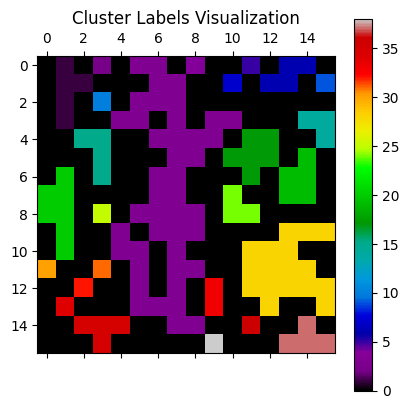

In [28]:
import matplotlib.pyplot as plt
def visualize_grid(labels):
    plt.matshow(labels, cmap='nipy_spectral')
    plt.colorbar()
    plt.title('Cluster Labels Visualization')
    plt.show()
visualize_grid(labels)

### Analysis time! 

Now for squares of length 8,16 and 32, we find the following as a function of $p$

1) The weighted average of the cluster size. If the system is percolating, do not count the percolating cluster. 
2) Percolation strength (this is the size of the percolating system divided by the size of the system. If system does not percolate, this value is 0)
3) Percolation rate (find the probability that the system will percolate)

Initialise $N$ number of systems and average over them to get probability. Plot these three using matplotlib. 
   
You can learn more about percolation and these terms from the following reference: https://www.mit.edu/~levitov/8.334/notes/percol_notes.pdf

In [ ]:
def weighted_average_cluster_size(n, p):
    grid = generate_grid(n, p)
    labels = hoshen_kopelman(grid)
    percolated = check_percolation(labels)

    label_counts = {}
    for i in range(n):
        for j in range(n):
            label = labels[i][j]
            if label > 0:
                if label not in label_counts:
                    label_counts[label] = 0
                label_counts[label] += 1

    percolating_labels = set()
    if percolated:
        top_labels = set(labels[0][j] for j in range(n) if labels[0][j] > 0)
        bottom_labels = set(labels[n-1][j] for j in range(n) if labels[n-1][j] > 0)
        percolating_labels = top_labels.intersection(bottom_labels)

    sizes = []
    for label, size in label_counts.items():
        if label not in percolating_labels:
            sizes.append(size)

    if not sizes:
        return 0

    numerator = sum(s**2 for s in sizes)
    denominator = sum(s for s in sizes)

    return numerator / denominator

In [6]:
def percolation_strength(n, p):
    grid = generate_grid(n, p)
    labels = hoshen_kopelman(grid)
    percolated = check_percolation(labels)

    if not percolated:
        return 0

    label_counts = {}
    for i in range(n):
        for j in range(n):
            label = labels[i][j]
            if label > 0:
                if label not in label_counts:
                    label_counts[label] = 0
                label_counts[label] += 1

    top_labels = set(labels[0][j] for j in range(n) if labels[0][j] > 0)
    bottom_labels = set(labels[n-1][j] for j in range(n) if labels[n-1][j] > 0)
    percolating_labels = top_labels.intersection(bottom_labels)

    percolating_size = sum(label_counts[label] for label in percolating_labels)
    total_size = n * n

    strength = percolating_size / total_size
    return strength

In [7]:
def percolation_rate(n, p, trials=100):
    percolation_count = 0
    for _ in range(trials):
        grid = generate_grid(n, p)
        labels = hoshen_kopelman(grid)
        if check_percolation(labels):
            percolation_count += 1
    rate = percolation_count / trials
    return rate

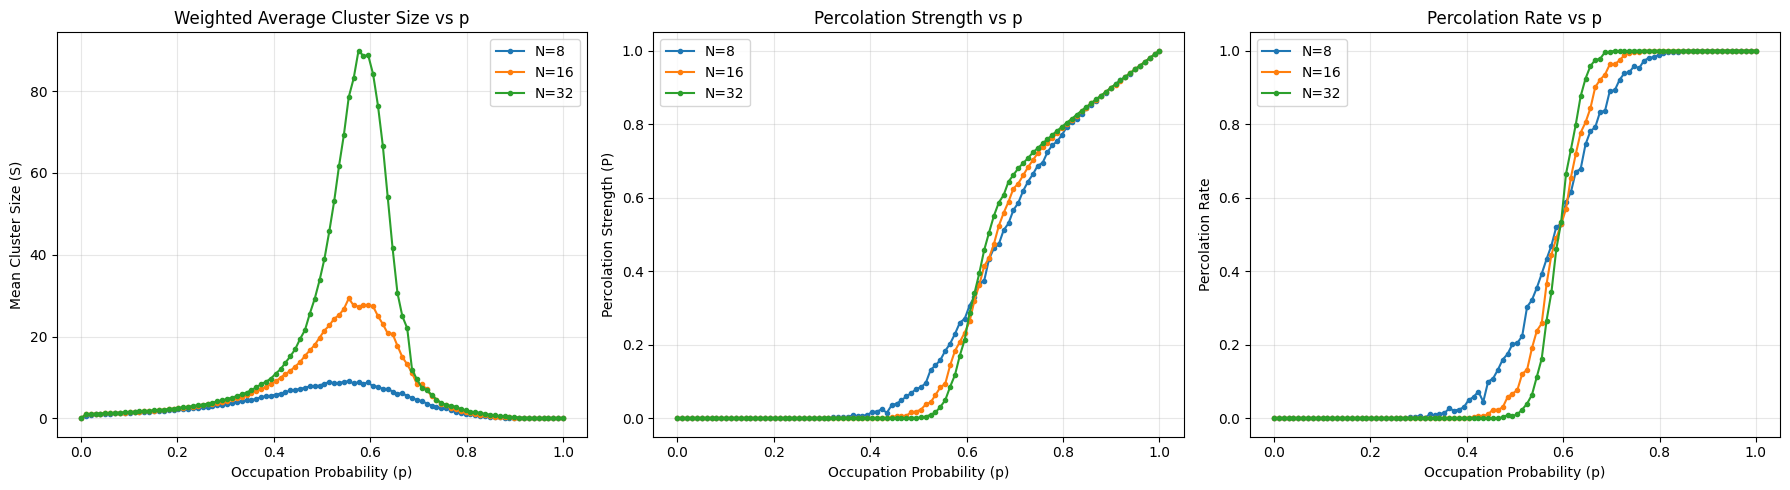

In [29]:
import numpy as np
import matplotlib.pyplot as plt

def analyze_percolation(n_values, p_values, trials=100):
    results = {}

    for n in n_values:
        avg_cluster_sizes = []
        percolation_strengths = []
        percolation_rates = []

        for p in p_values:
            total_cluster_size = 0
            total_strength = 0
            total_rate = 0

            for _ in range(trials):
                grid = generate_grid(n, p)
                labels = hoshen_kopelman(grid)
                percolated = check_percolation(labels)

                if percolated:
                    total_rate += 1
                label_counts = {}
                for i in range(n):
                    for j in range(n):
                        label = labels[i][j]
                        if label > 0:
                            label_counts[label] = label_counts.get(label, 0) + 1

                percolating_labels = set()
                if percolated:
                    top_labels = set(labels[0][j] for j in range(n) if labels[0][j] > 0)
                    bottom_labels = set(labels[n-1][j] for j in range(n) if labels[n-1][j] > 0)
                    percolating_labels = top_labels.intersection(bottom_labels)

                perc_cluster_size = sum(label_counts[l] for l in percolating_labels)
                total_strength += perc_cluster_size / (n * n)

                finite_sizes = []
                for label, size in label_counts.items():
                    if label not in percolating_labels:
                        finite_sizes.append(size)
                
                if finite_sizes:
                    numerator = sum(s**2 for s in finite_sizes)
                    denominator = sum(s for s in finite_sizes)
                    total_cluster_size += numerator / denominator
                else:
                    total_cluster_size += 0
            avg_cluster_sizes.append(total_cluster_size / trials)
            percolation_strengths.append(total_strength / trials)
            percolation_rates.append(total_rate / trials)

        results[n] = {
            'sizes': avg_cluster_sizes,
            'strength': percolation_strengths,
            'rates': percolation_rates
        }

    plt.figure(figsize=(18, 5))

    plt.subplot(1, 3, 1)
    for n in n_values:
        plt.plot(p_values, results[n]['sizes'], '-o', markersize=3, label=f'N={n}')
    plt.title('Weighted Average Cluster Size vs p')
    plt.xlabel('Occupation Probability (p)')
    plt.ylabel('Mean Cluster Size (S)')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.subplot(1, 3, 2)
    for n in n_values:
        plt.plot(p_values, results[n]['strength'], '-o', markersize=3, label=f'N={n}')
    plt.title('Percolation Strength vs p')
    plt.xlabel('Occupation Probability (p)')
    plt.ylabel('Percolation Strength (P)')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.subplot(1, 3, 3)
    for n in n_values:
        plt.plot(p_values, results[n]['rates'], '-o', markersize=3, label=f'N={n}')
    plt.title('Percolation Rate vs p')
    plt.xlabel('Occupation Probability (p)')
    plt.ylabel('Percolation Rate')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

n_values = [8, 16, 32]
p_values = np.linspace(0, 1, 100) 
analyze_percolation(n_values, p_values, trials=1000)

## Bonus: Bethe lattice

Read about the Bethe lattice: https://en.wikipedia.org/wiki/Bethe_lattice 

Can you find its critical probability? It's a very neat answer and does not require code. 

I started with z=3, p_c = 1/2
z=4, p_c = 1/2
z=5, p_c = 1/4

Continuing, p_c (for co-ordination number z) = 1/(z-1)

## Bonus 2.0: Bond percolation 

Similarily, we execute the above tasks for 2D lattice but with bonds instead of filled/unfilled sites. 

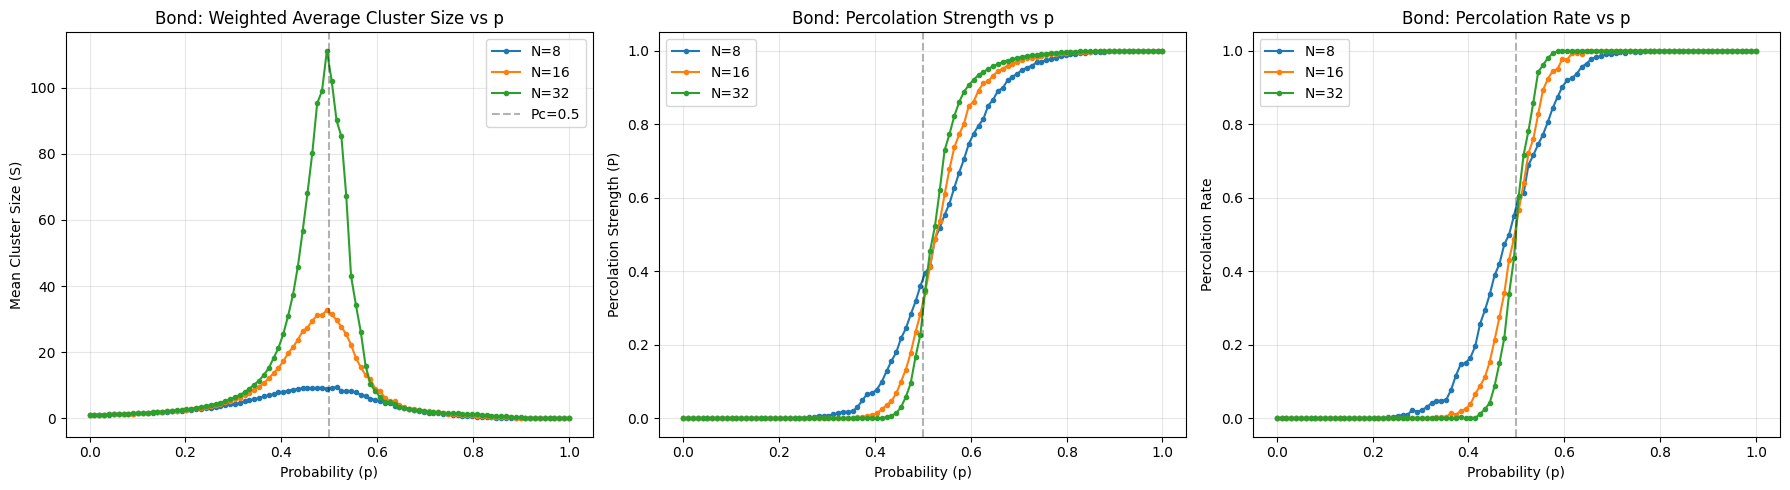

In [24]:
import numpy as np
import matplotlib.pyplot as plt

def generate_bond_grid(n, p):
    horizontal_bonds = np.random.rand(n, n-1) < p
    vertical_bonds = np.random.rand(n-1, n) < p
    return horizontal_bonds, vertical_bonds

def hoshen_kopelman_bond(horizontal_bonds, vertical_bonds):
    n = len(horizontal_bonds)
    labels = np.zeros((n, n), dtype=int)
    label_counter = 0
    parent = {}

    def find(x):
        path = []
        while parent[x] != x:
            path.append(x)
            x = parent[x]
        for node in path:
            parent[node] = x
        return x

    def union(x, y):
        rootX = find(x)
        rootY = find(y)
        if rootX != rootY:
            parent[rootY] = rootX

    for i in range(n):
        for j in range(n):
            neighbors = []
            if i > 0 and vertical_bonds[i-1][j]:
                neighbors.append(labels[i-1][j])
            if j > 0 and horizontal_bonds[i][j-1]:
                neighbors.append(labels[i][j-1])
                
            if not neighbors:
                label_counter += 1
                labels[i][j] = label_counter
                parent[label_counter] = label_counter
            else:
                min_label = min(neighbors)
                labels[i][j] = min_label
                for neighbor in neighbors:
                    union(min_label, neighbor)

    for i in range(n):
        for j in range(n):
            labels[i][j] = find(labels[i][j])
            
    return labels

def analyze_percolation_bond(n_values, p_values, trials=100):
    results = {}

    for n in n_values:
        avg_cluster_sizes = []
        percolation_strengths = []
        percolation_rates = []

        for p in p_values:
            total_cluster_size = 0
            total_strength = 0
            total_rate = 0

            for _ in range(trials):
                h_bonds, v_bonds = generate_bond_grid(n, p)
                labels = hoshen_kopelman_bond(h_bonds, v_bonds)

                flat_labels = labels.flatten()
                label_counts = {}
                for lbl in flat_labels:
                    label_counts[lbl] = label_counts.get(lbl, 0) + 1

                top_labels = set(labels[0, :])
                bottom_labels = set(labels[n-1, :])
                percolating_labels = top_labels.intersection(bottom_labels)
                is_percolated = len(percolating_labels) > 0

                if is_percolated:
                    total_rate += 1

                perc_cluster_size = sum(label_counts[l] for l in percolating_labels)
                total_strength += perc_cluster_size / (n * n)

                finite_sizes = []
                for label, size in label_counts.items():
                    if label not in percolating_labels:
                        finite_sizes.append(size)
                
                if finite_sizes:
                    numerator = sum(s**2 for s in finite_sizes)
                    denominator = sum(s for s in finite_sizes)
                    total_cluster_size += numerator / denominator
                else:
                    total_cluster_size += 0

            avg_cluster_sizes.append(total_cluster_size / trials)
            percolation_strengths.append(total_strength / trials)
            percolation_rates.append(total_rate / trials)

        results[n] = {
            'sizes': avg_cluster_sizes,
            'strength': percolation_strengths,
            'rates': percolation_rates
        }

    plt.figure(figsize=(18, 5))
    plt.subplot(1, 3, 1)
    for n in n_values:
        plt.plot(p_values, results[n]['sizes'], '-o', markersize=3, label=f'N={n}')
    plt.title('Bond: Weighted Average Cluster Size vs p')
    plt.axvline(x=0.5, color='k', linestyle='--', alpha=0.3, label='Pc=0.5')
    plt.xlabel('Probability (p)')
    plt.ylabel('Mean Cluster Size (S)')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.subplot(1, 3, 2)
    for n in n_values:
        plt.plot(p_values, results[n]['strength'], '-o', markersize=3, label=f'N={n}')
    plt.title('Bond: Percolation Strength vs p')
    plt.axvline(x=0.5, color='k', linestyle='--', alpha=0.3)
    plt.xlabel('Probability (p)')
    plt.ylabel('Percolation Strength (P)')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.subplot(1, 3, 3)
    for n in n_values:
        plt.plot(p_values, results[n]['rates'], '-o', markersize=3, label=f'N={n}')
    plt.title('Bond: Percolation Rate vs p')
    plt.axvline(x=0.5, color='k', linestyle='--', alpha=0.3)
    plt.xlabel('Probability (p)')
    plt.ylabel('Percolation Rate')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

n_values = [8, 16, 32]
p_values = np.linspace(0,1,100)

analyze_percolation_bond(n_values, p_values, trials=1000)